In [ ]:
import os
import sys

# Add root folder of the project in sys.path
module_path = os.path.abspath(os.path.join('..'))  # Up on one level higher 
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt

from math import *
from collections import defaultdict
from plot_results import PrepareData, Calculations, PlotResults

In [3]:
# Create a list with of amounts of data for all experiments
data_amounts = [0, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 60000]

# Create class instances
prepData = PrepareData()
calc = Calculations()
plot = PlotResults()

## Experiment 1 - MLP, 3 hidden layers

In [4]:
# Define global variabels fror the first experiment
base_path_exp1 = "/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/mnist_dataset/mnist_output/exp_1/weights_graphs_mlp"
layers_num_exp1 = 3

In [5]:
barcode_layers_exp1 = prepData.load_barcode_data(amounts=data_amounts, base_path=base_path_exp1)

### Mean lifetime

/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/plot_results.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


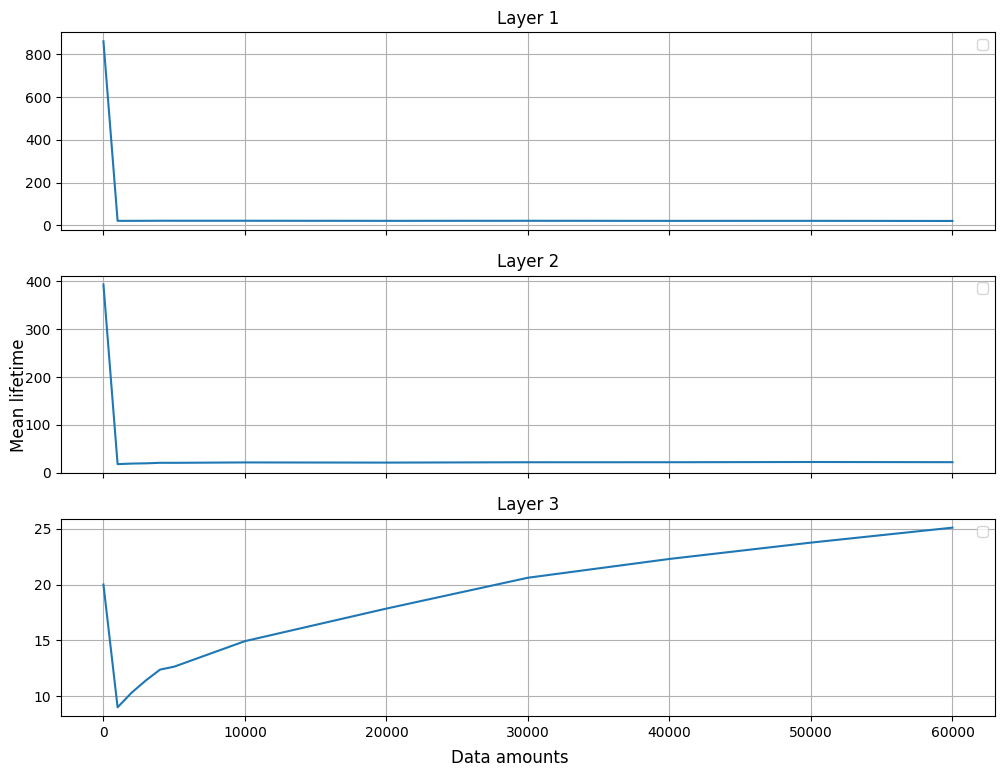

In [6]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_homologies_ml_exp1 = list()

# Fill in created list
for i in range(layers_num_exp1):
    h_layer = list()
    for batch in data_amounts:
        h_layer.append(calc.calculate_homology_mean_lifetime(barcode_layers_exp1[batch][i]))
    layers_homologies_ml_exp1.append(h_layer)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_homologies_ml_exp1, label='Mean lifetime', layers_num=layers_num_exp1)

### Mean lifetime first points

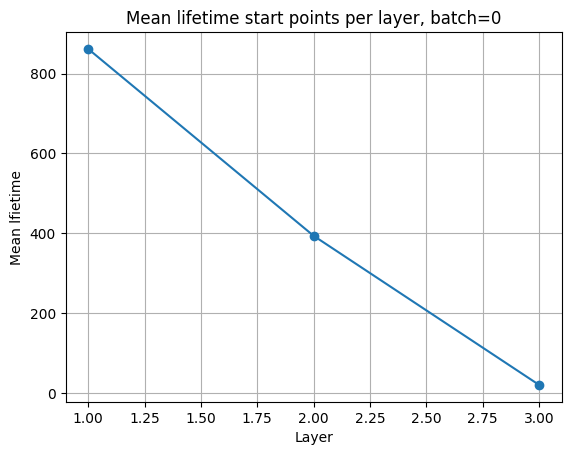

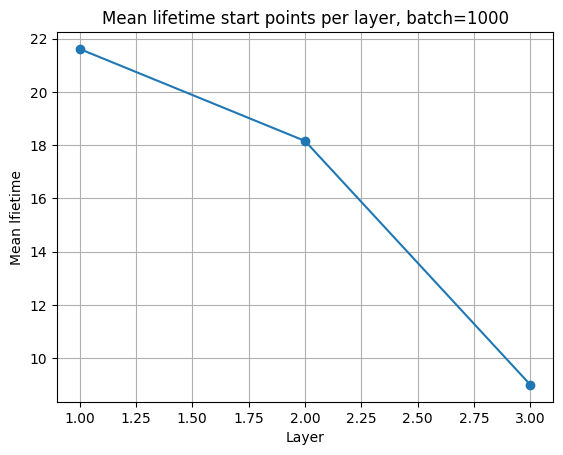

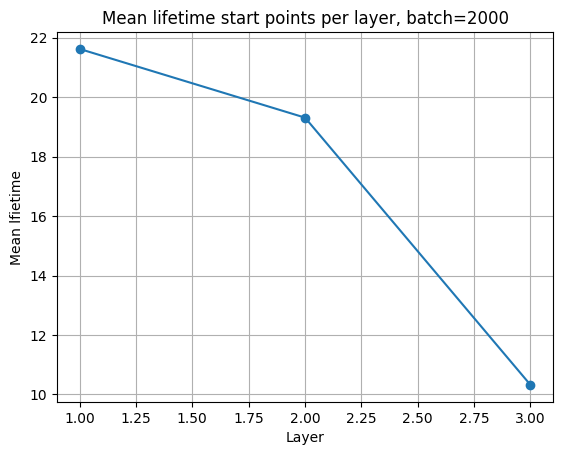

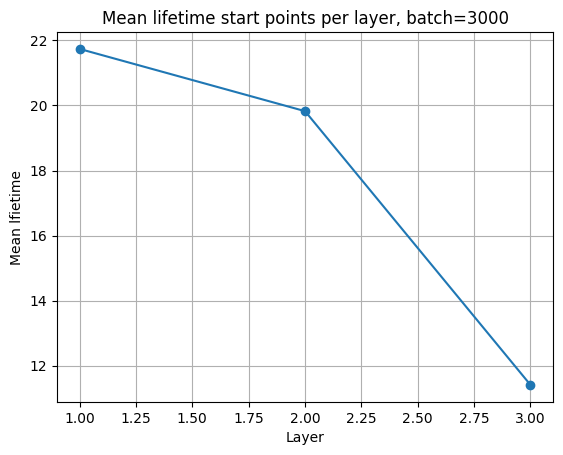

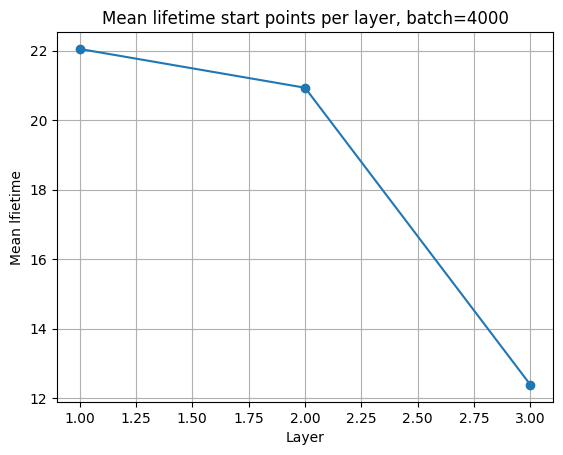

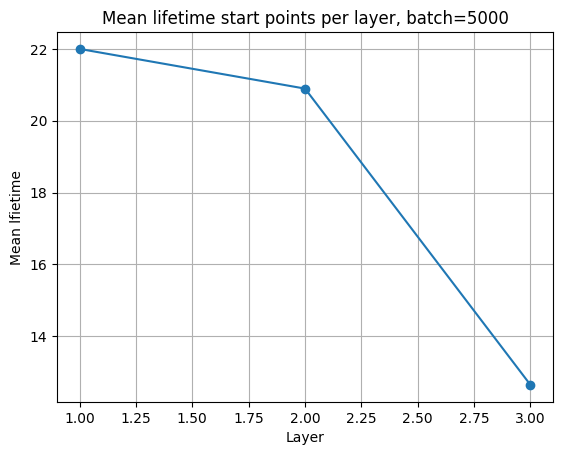

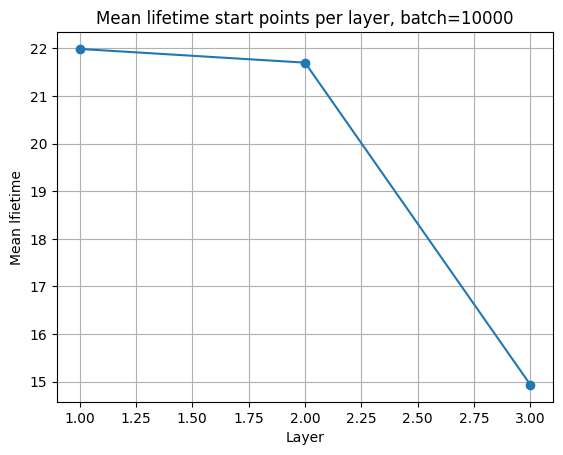

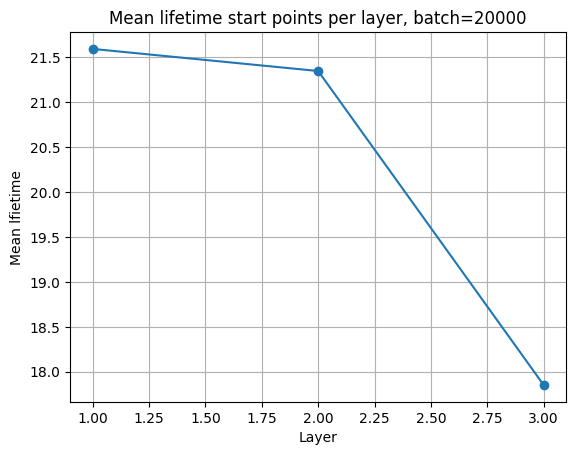

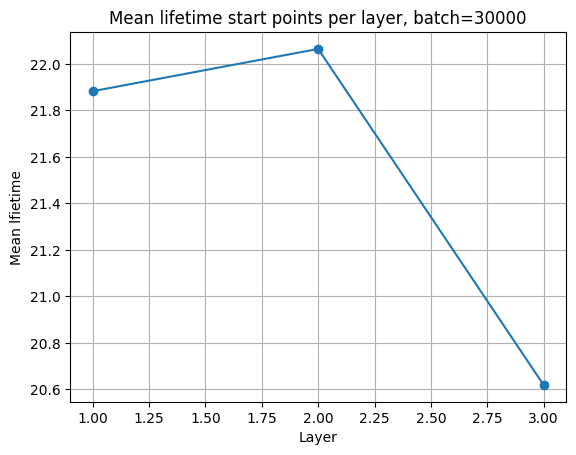

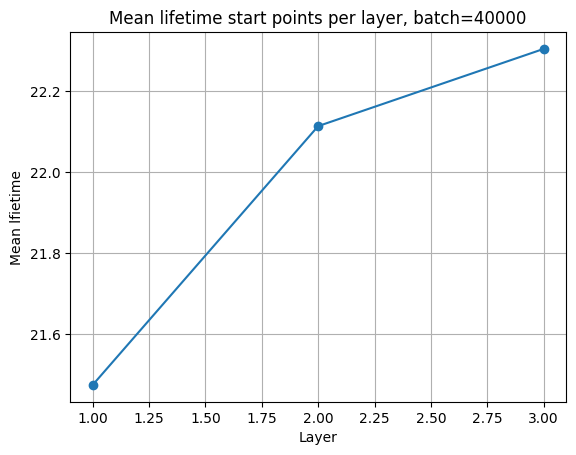

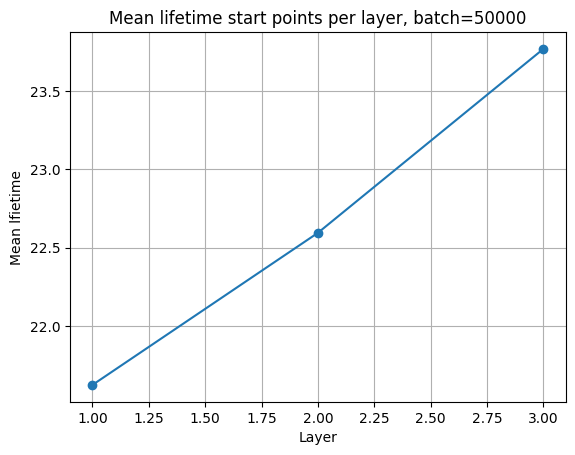

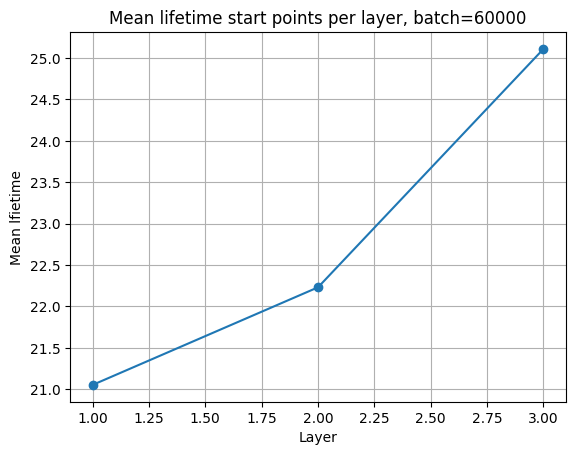

In [7]:
for i in range(len(data_amounts)):
    plot.plot_ml_first_points(layers=layers_homologies_ml_exp1, data_amount_index=i, data_amounts=data_amounts, layers_num=layers_num_exp1)

### Persist entropy 

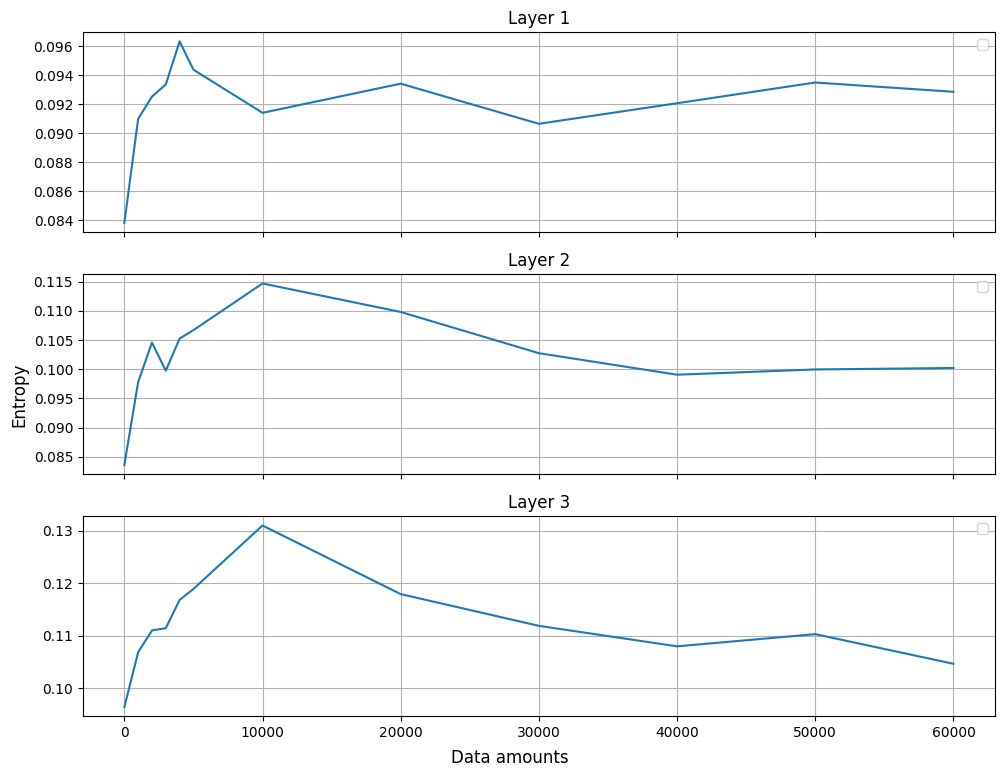

In [8]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_entropy_exp1 = list()

# Fill in created list
for j in range(layers_num_exp1):
    layer_ent = list()
    for batch in data_amounts:
        layer_ent.append(calc.calculate_persist_entropy(barcode_layers_exp1[batch][j]))
    layers_entropy_exp1.append(layer_ent)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_entropy_exp1, label='Entropy', layers_num=layers_num_exp1)

### Norm persist entropy

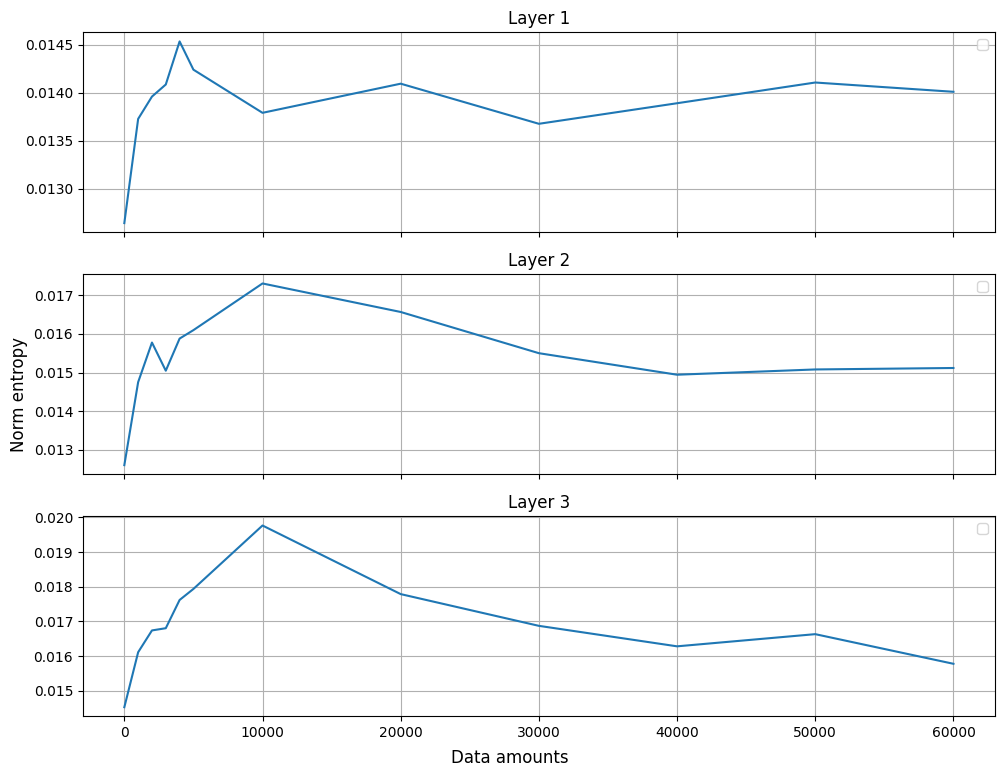

In [9]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_norm_entropy_exp1 = list()

# Fill in created list
for q in range(layers_num_exp1):
    layer_norm_ent = list()
    for batch in data_amounts:
        layer_norm_ent.append(calc.calculate_norm_persist_entropy(barcode_layers_exp1[batch][q]))
    layers_norm_entropy_exp1.append(layer_norm_ent)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_norm_entropy_exp1, label='Norm entropy', layers_num=layers_num_exp1)

## Experiment 2 - MLP, 4 hidden layers

In [10]:
# Define global variabels fror the first experiment
base_path_exp2 = "/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/mnist_dataset/mnist_output/exp_2/weights_graphs_mlp"
layers_num_exp2 = 4

In [11]:
barcode_layers_exp2 = prepData.load_barcode_data(amounts=data_amounts, base_path=base_path_exp2)

### Mean lifetime

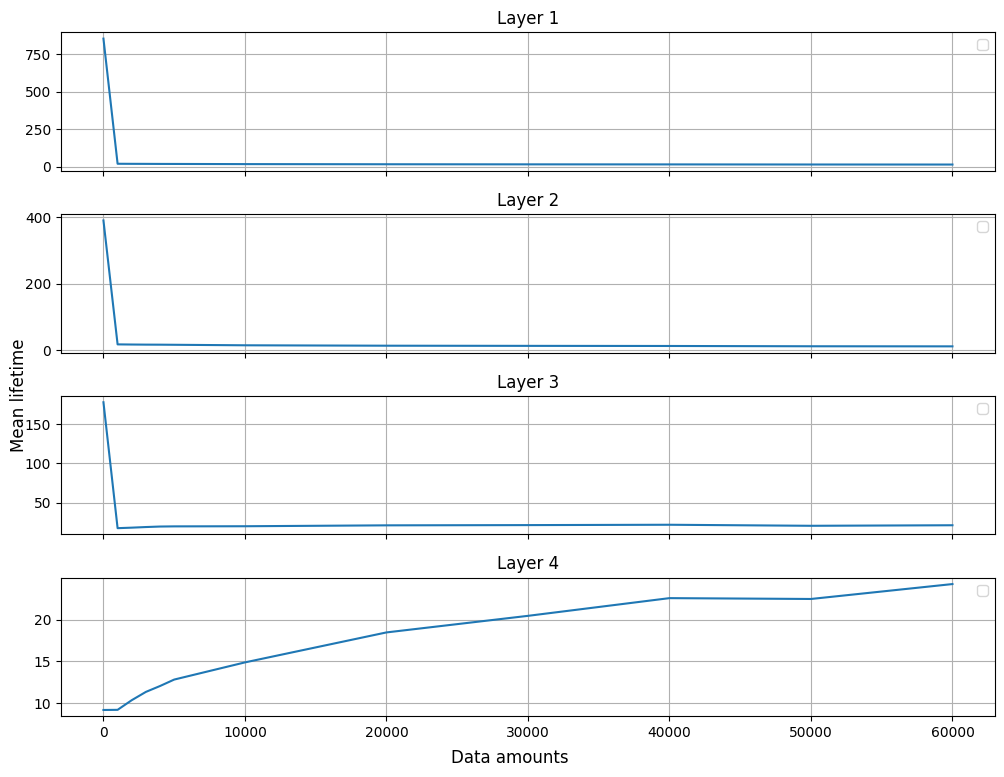

In [12]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_homologies_ml_exp2 = list()

# Fill in created list
for i in range(layers_num_exp2):
    h_layer = list()
    for batch in data_amounts:
        h_layer.append(calc.calculate_homology_mean_lifetime(barcode_layers_exp2[batch][i]))
    layers_homologies_ml_exp2.append(h_layer)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_homologies_ml_exp2, label='Mean lifetime', layers_num=layers_num_exp2)

### Mean lifetime start points

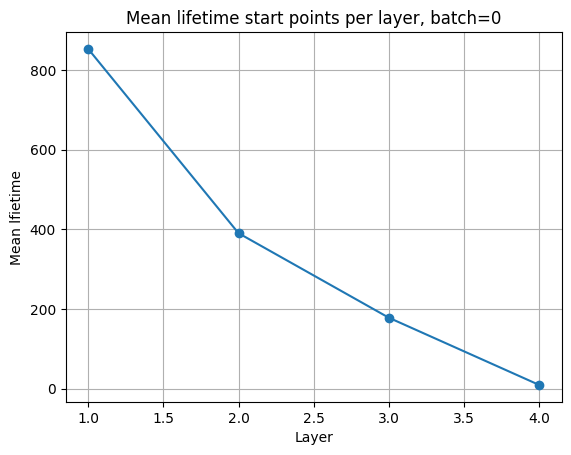

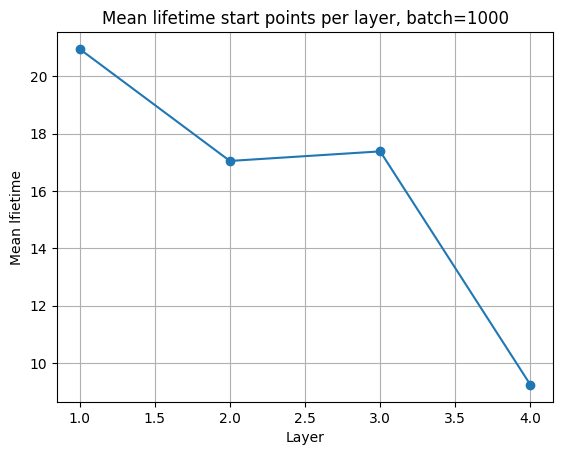

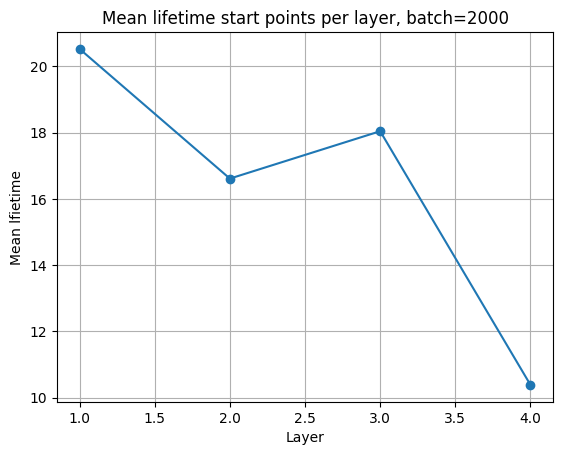

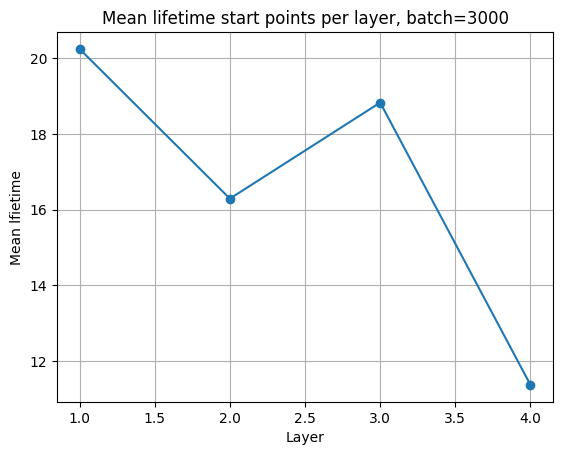

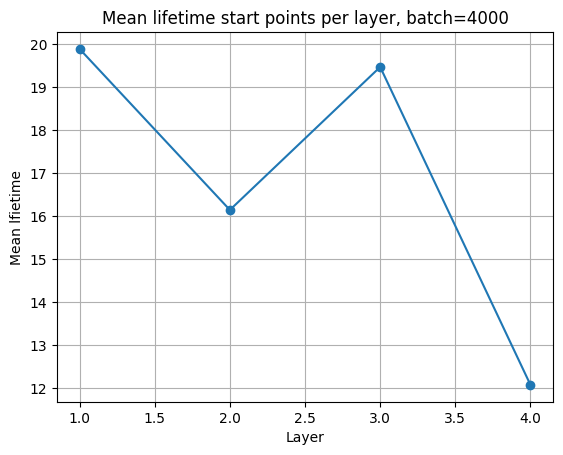

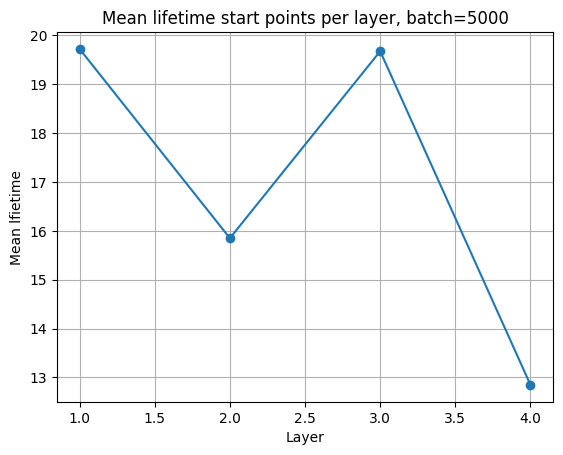

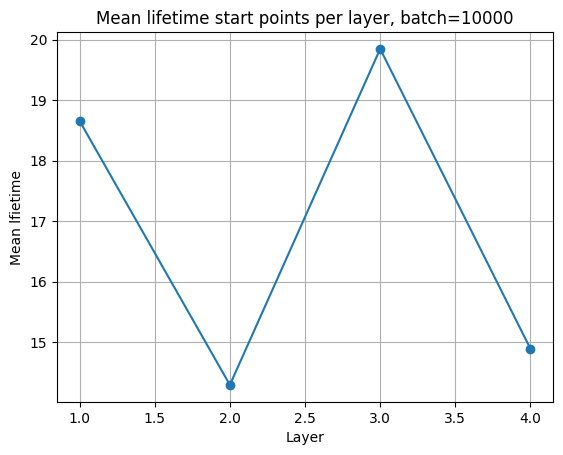

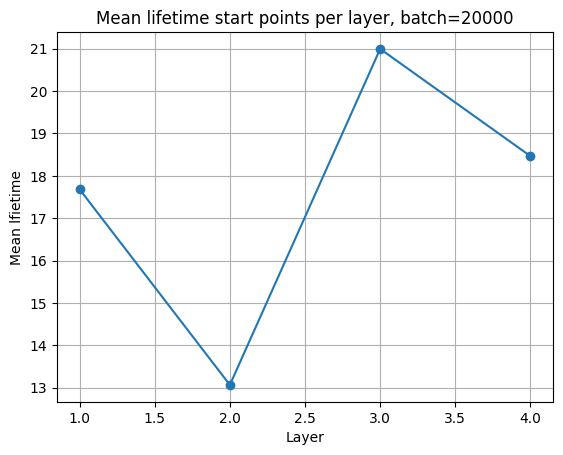

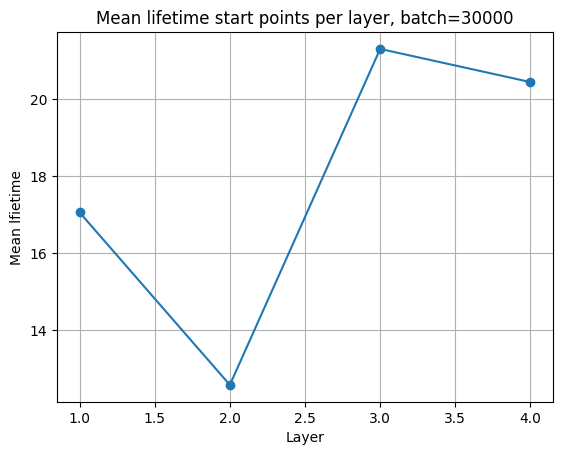

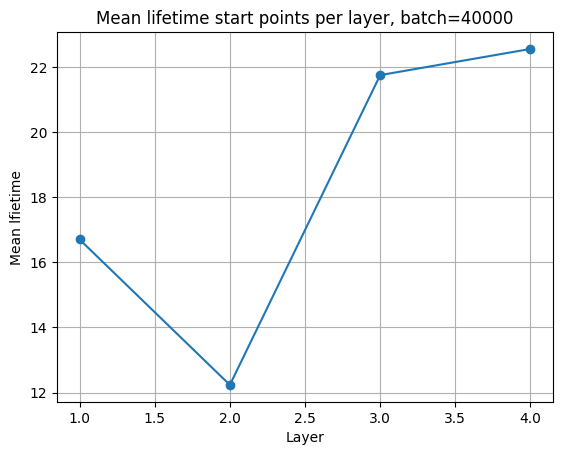

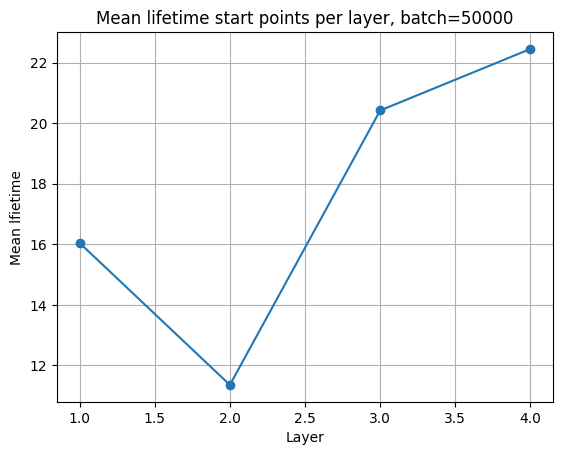

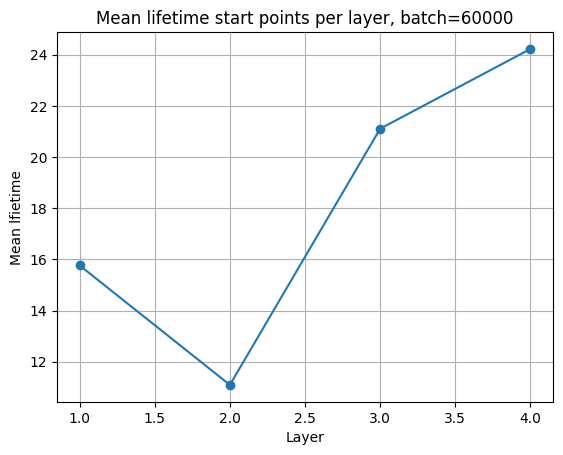

In [13]:
for i in range(len(data_amounts)):
    plot.plot_ml_first_points(layers=layers_homologies_ml_exp2, data_amount_index=i, data_amounts=data_amounts, layers_num=layers_num_exp2)

### Persist entropy

/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/plot_results.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


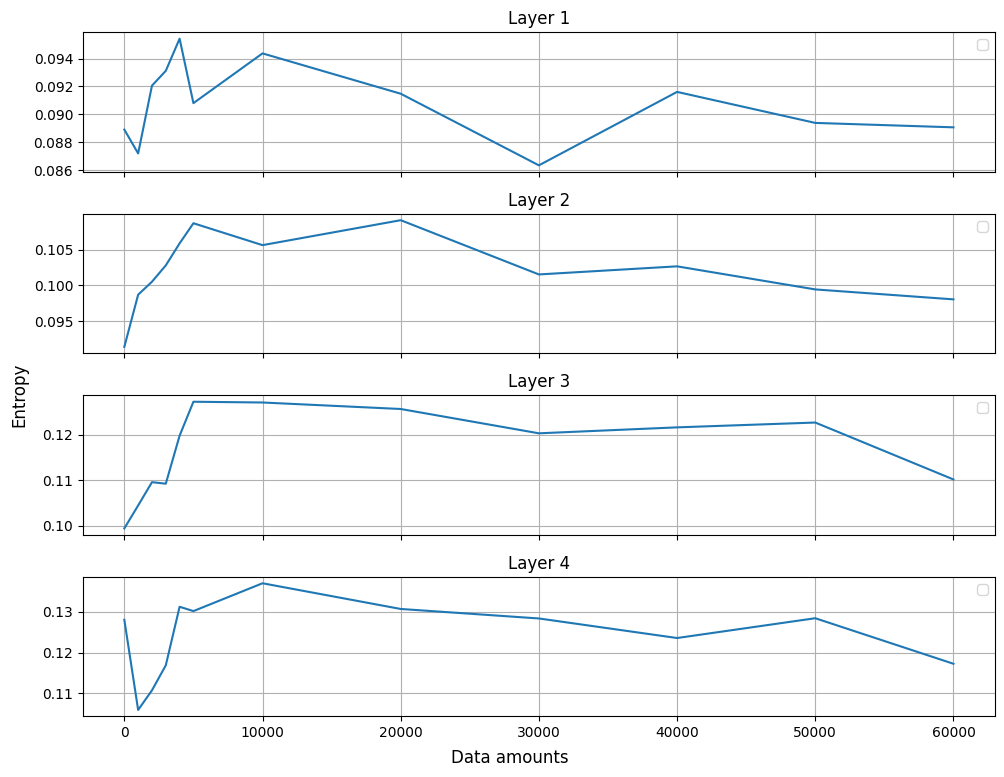

In [15]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_entropy_exp2 = list()

# Fill in created list
for j in range(layers_num_exp2):
    layer_ent = list()
    for batch in data_amounts:
        layer_ent.append(calc.calculate_persist_entropy(barcode_layers_exp2[batch][j]))
    layers_entropy_exp2.append(layer_ent)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_entropy_exp2, label='Entropy', layers_num=layers_num_exp2)

### Norm persist entropy

/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/plot_results.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


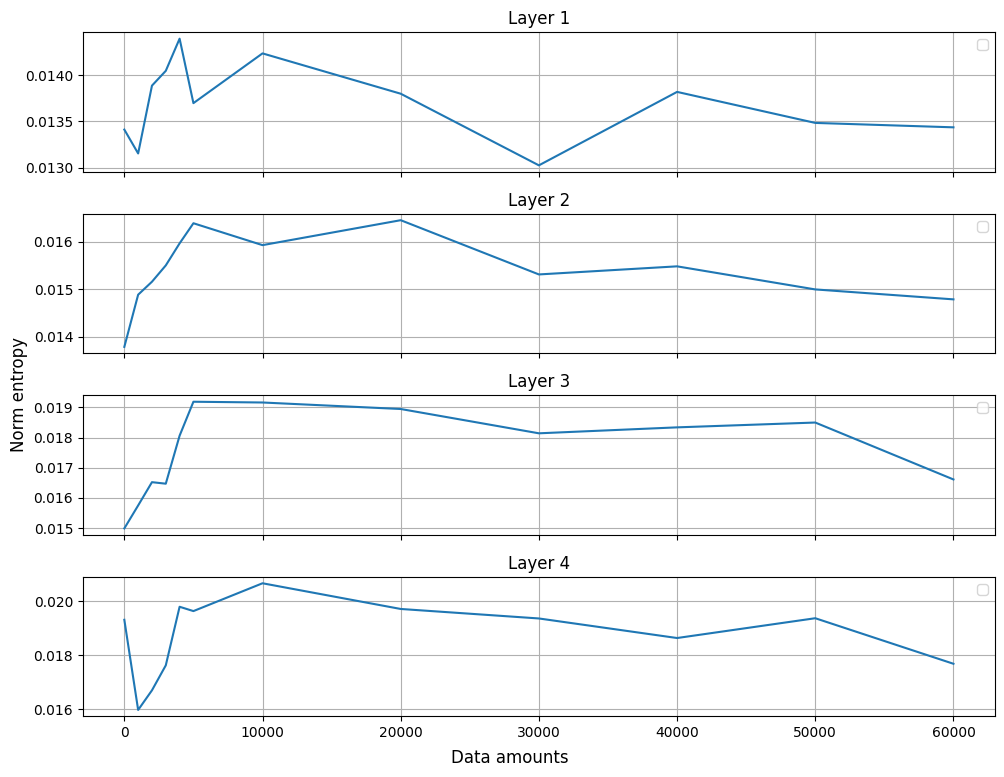

In [16]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_norm_entropy_exp2 = list()

# Fill in created list
for q in range(layers_num_exp2):
    layer_norm_ent = list()
    for batch in data_amounts:
        layer_norm_ent.append(calc.calculate_norm_persist_entropy(barcode_layers_exp2[batch][q]))
    layers_norm_entropy_exp2.append(layer_norm_ent)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_norm_entropy_exp2, label='Norm entropy', layers_num=layers_num_exp2)

## Experiment 3 - MLP, 5 hidden layers

In [17]:
# Define global variabels fror the first experiment
base_path_exp3 = "/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/mnist_dataset/mnist_output/exp_3/weights_graphs_mlp"
layers_num_exp3 = 5

In [18]:
barcode_layers_exp3 = prepData.load_barcode_data(amounts=data_amounts, base_path=base_path_exp3)

### Mean lifetime

/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/plot_results.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


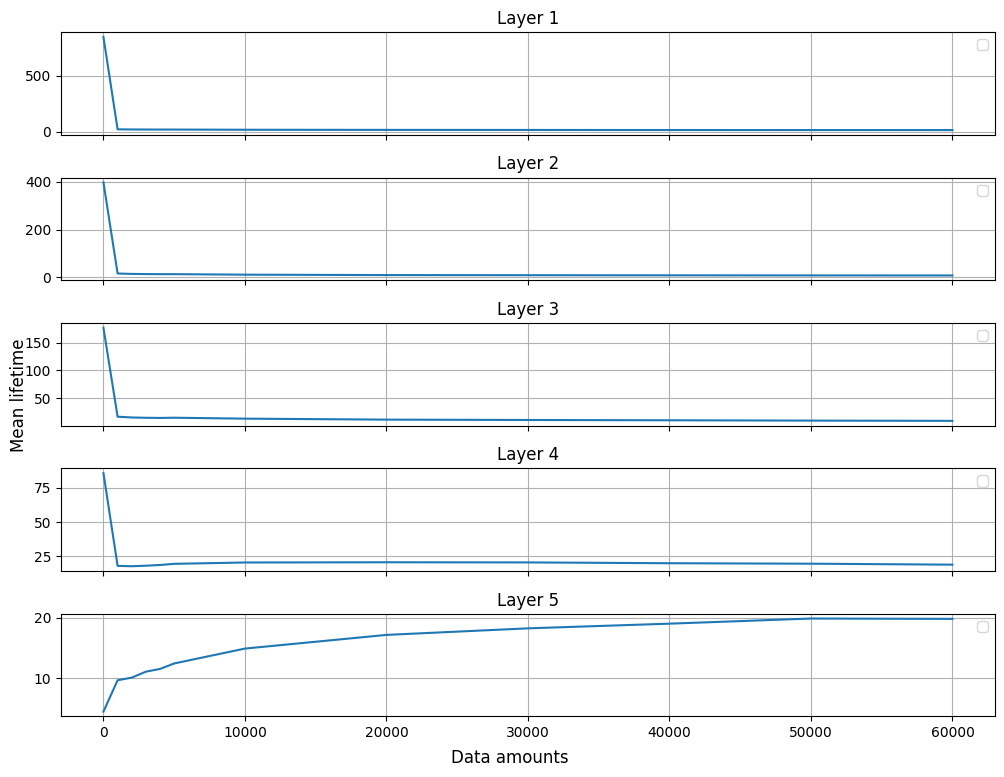

In [19]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_homologies_ml_exp3 = list()

# Fill in created list
for i in range(layers_num_exp3):
    h_layer = list()
    for batch in data_amounts:
        h_layer.append(calc.calculate_homology_mean_lifetime(barcode_layers_exp3[batch][i]))
    layers_homologies_ml_exp3.append(h_layer)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_homologies_ml_exp3, label='Mean lifetime', layers_num=layers_num_exp3)

### Mean lifetime first points

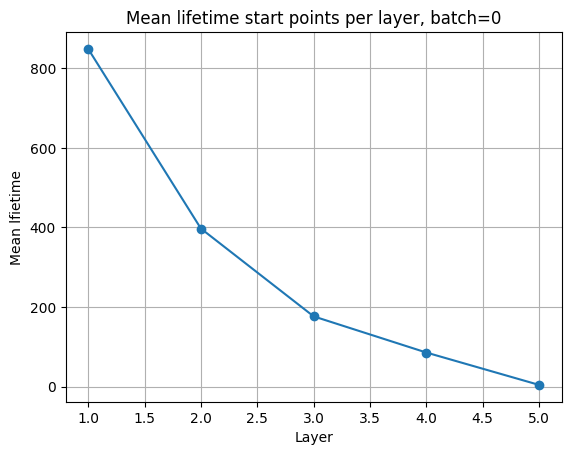

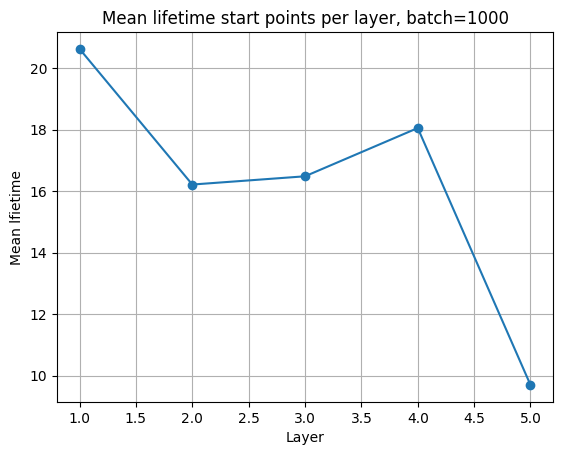

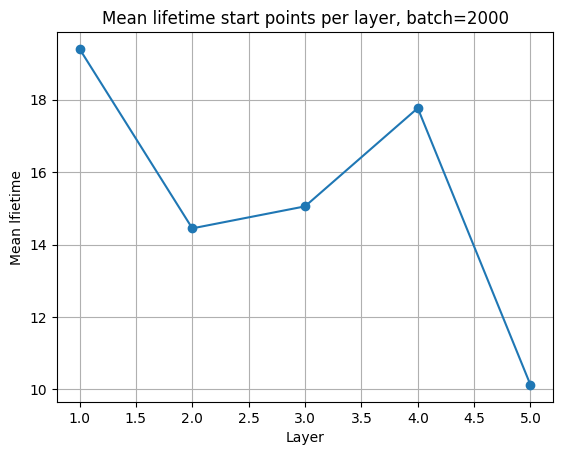

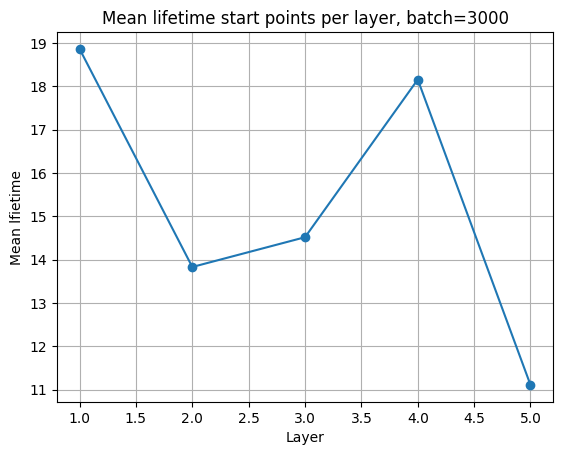

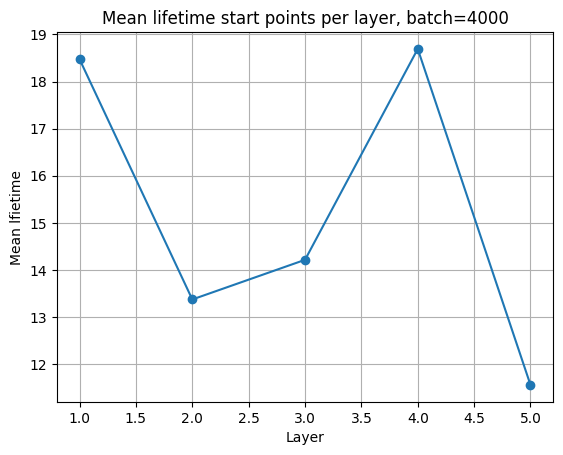

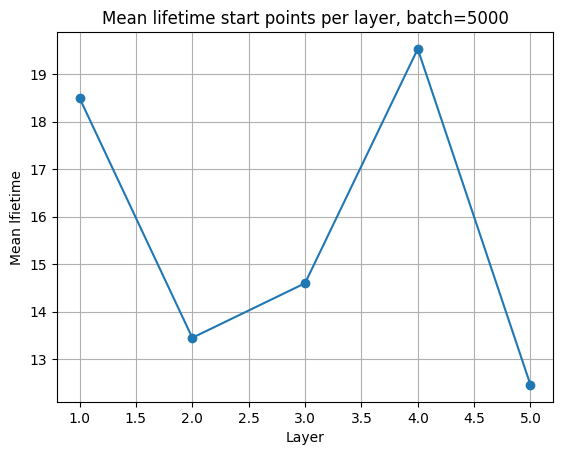

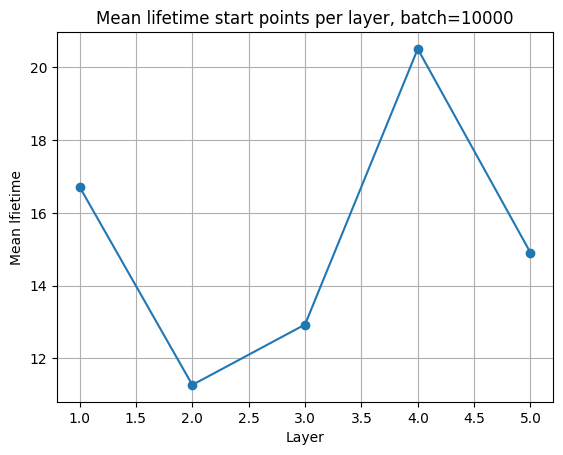

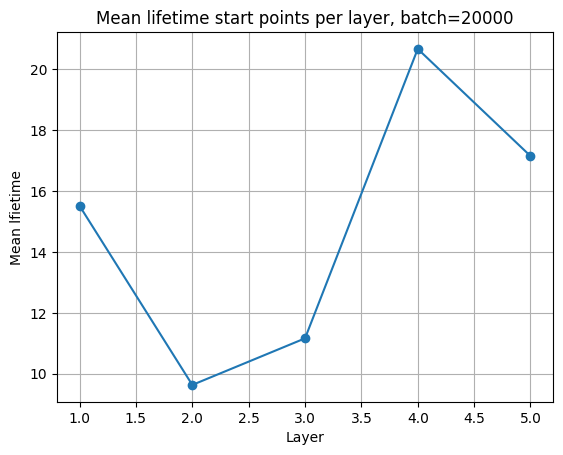

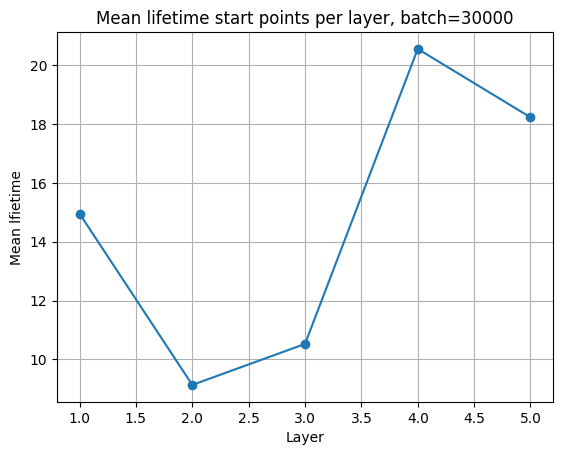

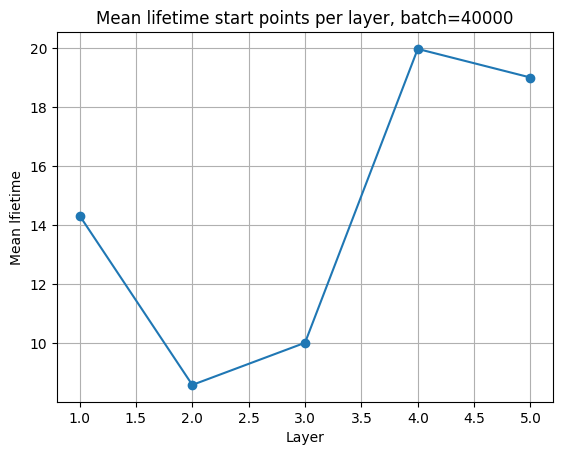

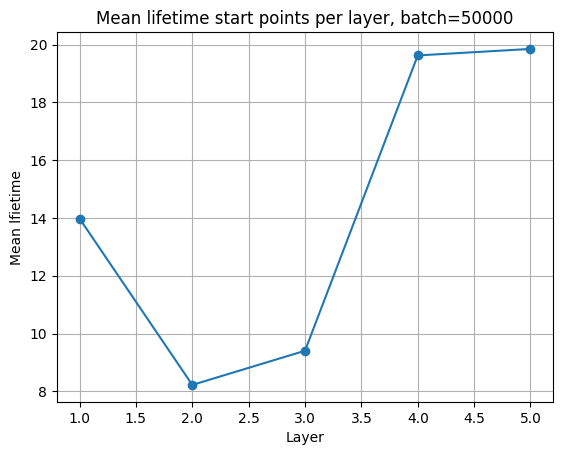

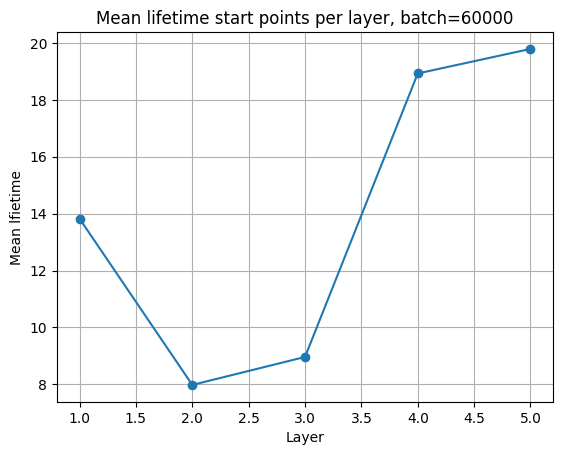

In [20]:
for i in range(len(data_amounts)):
    plot.plot_ml_first_points(layers=layers_homologies_ml_exp3, data_amount_index=i, data_amounts=data_amounts, layers_num=layers_num_exp3)

### Persist entropy

/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/plot_results.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


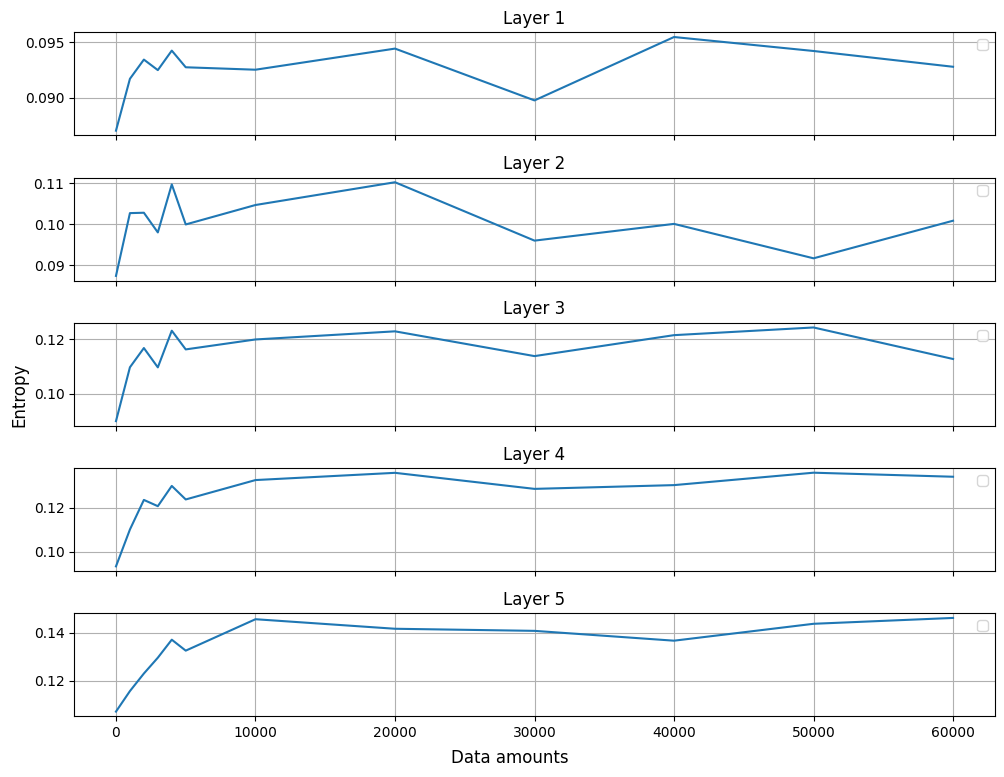

In [21]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_entropy_exp3 = list()

# Fill in created list
for j in range(layers_num_exp3):
    layer_ent = list()
    for batch in data_amounts:
        layer_ent.append(calc.calculate_persist_entropy(barcode_layers_exp3[batch][j]))
    layers_entropy_exp3.append(layer_ent)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_entropy_exp3, label='Entropy', layers_num=layers_num_exp3)

### Norm persist entropy

/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/plot_results.py:179: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


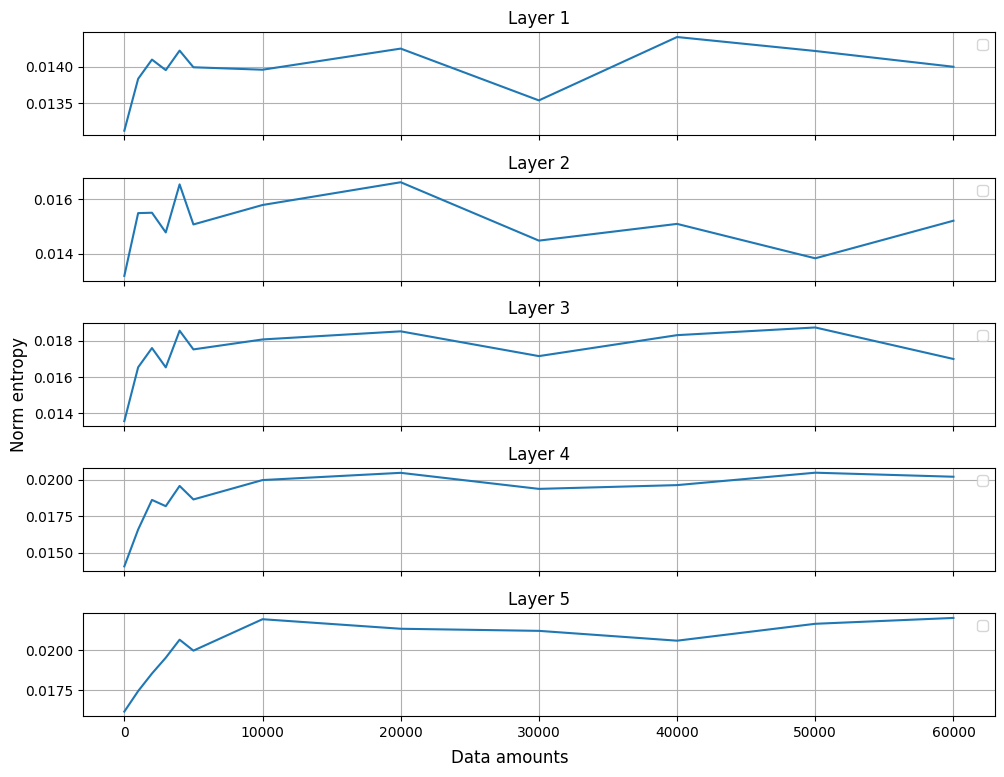

In [22]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_norm_entropy_exp3 = list()

# Fill in created list
for q in range(layers_num_exp3):
    layer_norm_ent = list()
    for batch in data_amounts:
        layer_norm_ent.append(calc.calculate_norm_persist_entropy(barcode_layers_exp3[batch][q]))
    layers_norm_entropy_exp3.append(layer_norm_ent)

plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_norm_entropy_exp3, label='Norm entropy', layers_num=layers_num_exp3)